## CS 445: Computational Photography

## Programming Project #3: Gradient Domain Fusion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time
import scipy
import scipy.sparse.linalg

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/cs445_projects/mp3/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .
import utils

## Part 1 Toy Problem (20 pts)

In [ ]:
def toy_reconstruct(img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2

    :param img: numpy.ndarray
    :return: numpy.ndarray
    """

    img_h, img_w = img.shape[:2]
    im2var = np.arange(img_h * img_w).reshape(img_h, img_w)
    num_eq = 0

    A = scipy.sparse.lil_matrix((2 * img_h * img_w + 1, img_h * img_w))
    b = np.zeros((2 * img_h * img_w + 1,))

    for y in range(img_h):
        for x in range(img_w):
            if x < img_w - 1:
                num_eq += 1
                A[num_eq, im2var[y, x + 1]] = 1
                A[num_eq, im2var[y, x]] = -1
                b[num_eq] = img[y, x + 1] - img[y, x]

            if y < img_h - 1:
                num_eq += 1
                A[num_eq, im2var[y + 1, x]] = 1
                A[num_eq, im2var[y, x]] = -1
                b[num_eq] = img[y + 1, x] - img[y, x]

    num_eq += 1
    A[num_eq, im2var[0, 0]] = 1
    b[num_eq] = img[0, 0]

    v = scipy.sparse.linalg.lsqr(A, b)[0]
    v = v.reshape(img_h, img_w)
    v += img[0, 0]

    return v


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

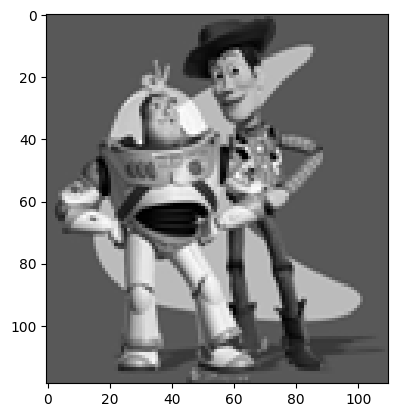

Max error is:  0.34586722467740005


In [ ]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
plt.imshow(toy_img, cmap="gray")
plt.show()

im_out = toy_reconstruct(toy_img)
plt.imshow(im_out, cmap="gray")
plt.show()
print("Max error is: ", np.sqrt(((im_out - toy_img)**2).max()))

## Preparation

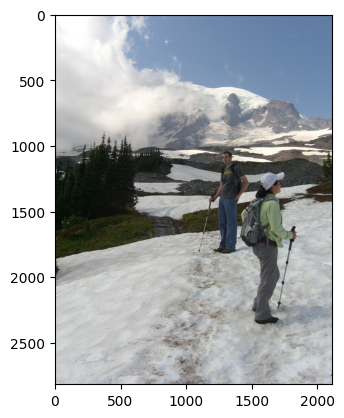

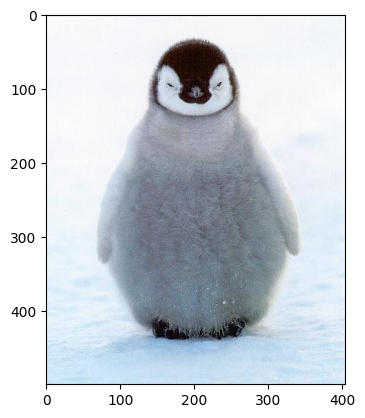

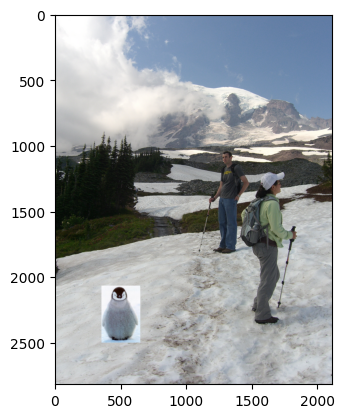

In [ ]:
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/penguin-chick.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.imshow(object_img)
plt.show()

use_interface = False  # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:
  xs = (65, 359, 359, 65)
  ys = (24, 24, 457, 457)
  object_mask = utils.get_mask(ys, xs, object_img)
  bottom_center = (500, 2500) # (x,y)

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



In [ ]:
if use_interface:
  import matplotlib.pyplot as plt
  %matplotlib notebook
  mask_coords = specify_mask(object_img)

In [ ]:
if use_interface:
  xs = mask_coords[0]
  ys = mask_coords[1]
  %matplotlib inline
  import matplotlib.pyplot as plt
  plt.figure()
  object_mask = get_mask(ys, xs, object_img)

In [ ]:
if use_interface:
  %matplotlib notebook
  import matplotlib.pyplot as plt
  bottom_center = specify_bottom_center(background_img)
  %matplotlib inline
  import matplotlib.pyplot as plt

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



## Part 2 Poisson Blending (50 pts)

In [ ]:
def poisson_blend(object_img, object_mask, bg_img, bg_ul):
    """
    Returns a Poisson blended image with masked object_img over the bg_img at position specified by bg_ul.
    Can be implemented to operate on a single channel or multiple channels
    :param object_img: the image containing the foreground object
    :param object_mask: the mask of the foreground object in object_img
    :param background_img: the background image
    :param bg_ul: position (row, col) in background image corresponding to (0,0) of object_img
    """
    #TO DO

    def idxs(x, y, im_w, im_h):
        final = []
        if (x + 1) < im_w:
          final.append((x + 1, y))
        if (x - 1) >= 0:
          final.append((x - 1, y))
        if (y + 1) < im_h:
          final.append((x, y + 1))
        if (y - 1) >= 0:
          final.append((x, y - 1))
        return final

    im_h, im_w = object_img.shape
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)
    one = bg_img[bg_ul[0]:(bg_ul[0]+im_h), bg_ul[1]:(bg_ul[1]+im_w)]
    checker = 4 * (im_h * im_w)
    A = scipy.sparse.lil_matrix((checker, im_h * im_w), dtype='double')
    b = np.zeros((checker, 1), dtype='double')
    e = 0


    for i in range(im_w):
        for j in range(im_h):
            neighbors = idxs(i, j, im_w, im_h)
            if(object_mask[j,i]):
              for (x,y) in neighbors:
                e += 1
                A[e, im2var[j, i]] = 1
                if(object_mask[y,x]):
                  A[e, im2var[y,x]] = -1
                  b[e] = object_img[j,i] - object_img[y,x]
                else:
                  b[e] = object_img[j,i] - object_img[y,x] + one[y,x]
    vals = scipy.sparse.linalg.lsqr(A.tocsr(), b)[0]

    im_out = bg_img.copy()
    for i in range(im_w):
        for j in range(im_h):
          if object_mask[j,i]:
            im_out[bg_ul[0] + j, bg_ul[1] + i] = vals[im2var[j,i]]

    return im_out



In [ ]:
im_blend = np.zeros(background_img.shape)
for b in np.arange(3):
  im_blend[:,:,b] = poisson_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)

plt.figure(figsize=(15,15))
plt.imshow(im_blend)

Output hidden; open in https://colab.research.google.com to view.

## Part 3 Mixed Gradients (20 pts)

In [ ]:
def mixed_blend(object_img, object_mask, background_img, bg_ul):
    """
    Returns a mixed gradients blended image with masked object_img over the background_img at position specified by bg_ul.
    Can be implemented to operate on a single channel or multiple channels
    :param object_img: the image containing the foreground object
    :param object_mask: the mask of the foreground object in object_img
    :param background_img: the background image
    :param bg_ul: position (row, col) in background image corresponding to (0,0) of object_img
    """
    def idxs(x, y, im_w, im_h):
        final = []
        if (x + 1) < im_w:
            final.append((x + 1, y))
        if (x - 1) >= 0:
            final.append((x - 1, y))
        if (y + 1) < im_h:
            final.append((x, y + 1))
        if (y - 1) >= 0:
            final.append((x, y - 1))
        return final

    im_h, im_w = object_img.shape
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)
    one = background_img[bg_ul[0]:(bg_ul[0]+im_h), bg_ul[1]:(bg_ul[1]+im_w)]
    checker = 4 * (im_h * im_w)
    A = scipy.sparse.lil_matrix((checker, im_h * im_w), dtype='double')
    b = np.zeros((checker, 1), dtype='double')
    e = 0

    for i in range(im_w):
        for j in range(im_h):
            neighbors = idxs(i, j, im_w, im_h)
            if(object_mask[j,i]):
              for (x,y) in neighbors:
                e += 1
                d_ij = max(np.abs(object_img[j, i] - object_img[y, x]), np.abs(one[y, x] - background_img[bg_ul[0] + j, bg_ul[1] + i]))
                A[e, im2var[j, i]] = 1
                if(object_mask[y,x]):
                  A[e, im2var[y,x]] = -1
                  b[e] = d_ij * (object_img[j,i] - object_img[y,x])
                else:
                  b[e] = d_ij * (object_img[j,i] - object_img[y,x] + one[y,x])

    vals = scipy.sparse.linalg.lsqr(A.tocsr(), b)[0]

    im_out = background_img.copy()
    for i in range(im_w):
        for j in range(im_h):
            if object_mask[j,i]:
                im_out[bg_ul[0] + j, bg_ul[1] + i] = vals[im2var[j,i]]

    return im_out

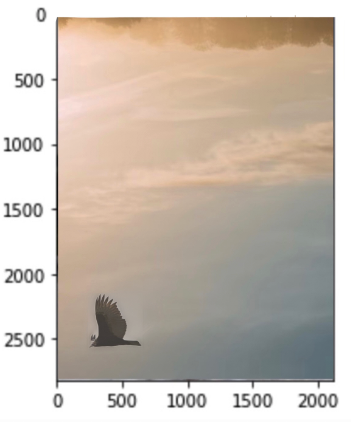

In [ ]:
im_mix = np.zeros(background_img.shape)
for b in np.arange(3):
  im_mix[:,:,b] = mixed_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)

plt.figure(figsize=(15,15))
plt.imshow(im_mix)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [ ]:
def color2gray(img):
    gray = np.dot(img, [0.2989, 0.5870, 0.1140])
    return gray

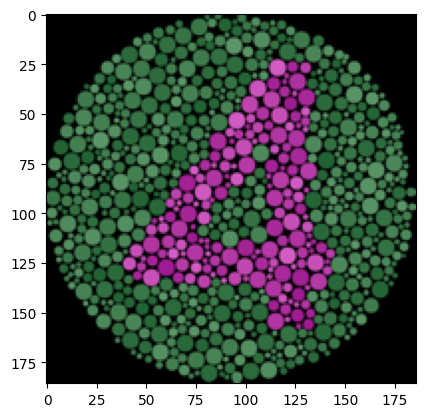

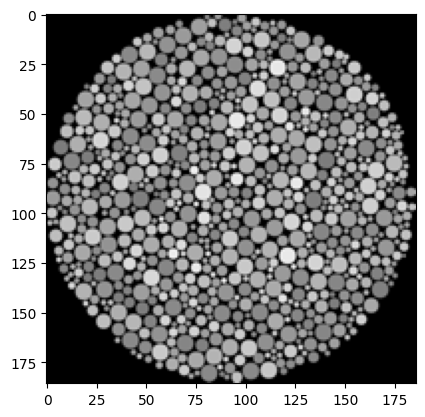

In [ ]:
rgb_img = cv2.cvtColor(cv2.imread('samples/colorBlind4.png'), cv2.COLOR_BGR2RGB).astype('double') / 255.0

plt.imshow(rgb_img)
plt.show()

gray_img = color2gray(rgb_img)
plt.imshow(gray_img, cmap='gray')
plt.show()

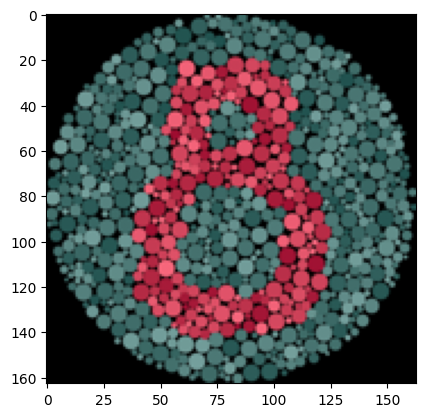

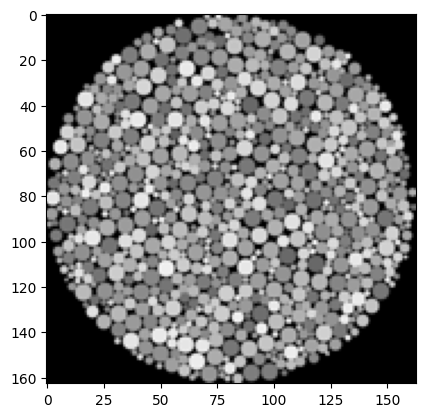

In [ ]:
rgb_img = cv2.cvtColor(cv2.imread('samples/colorBlind8.png'), cv2.COLOR_BGR2RGB).astype('double') / 255.0

plt.imshow(rgb_img)
plt.show()

gray_img = color2gray(rgb_img)
plt.imshow(gray_img, cmap='gray')
plt.show()

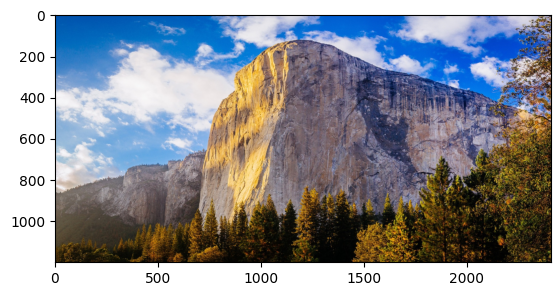

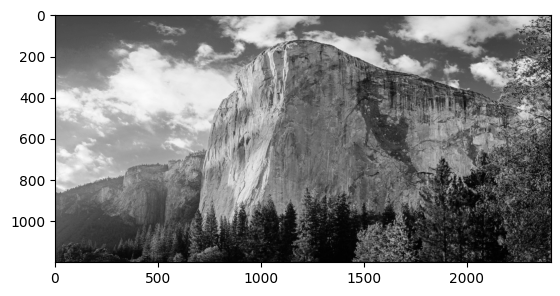

In [ ]:
rgb_img = cv2.cvtColor(cv2.imread('samples/Yosemite.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0

plt.imshow(rgb_img)
plt.show()

gray_img = color2gray(rgb_img)
plt.imshow(gray_img, cmap='gray')
plt.show()

## Laplacian pyramid blending (20 pts)

In [ ]:
import cv2
import numpy as np

def laplacian_blend(object_img, object_mask, bg_img, bg_ul):
    # Convert object_img and bg_img to float32
    object_img = object_img.astype(np.float32)
    bg_img = bg_img.astype(np.float32)

    # Resize object_mask to match object_img and convert to float32
    object_mask = cv2.resize(object_mask, (object_img.shape[1], object_img.shape[0])).astype(np.float32) / 255.0

    # Create Gaussian and Laplacian pyramids for object_img, object_mask, and bg_img
    object_gaussian_pyramid = [object_img]
    object_mask_gaussian_pyramid = [object_mask]
    bg_gaussian_pyramid = [bg_img]

    for i in range(1, 6):
        object_gaussian_pyramid.append(cv2.pyrDown(object_gaussian_pyramid[i-1]))
        object_mask_gaussian_pyramid.append(cv2.pyrDown(object_mask_gaussian_pyramid[i-1]))
        bg_gaussian_pyramid.append(cv2.pyrDown(bg_gaussian_pyramid[i-1]))

    object_laplacian_pyramid = [object_gaussian_pyramid[5]]
    object_mask_laplacian_pyramid = [object_mask_gaussian_pyramid[5]]
    bg_laplacian_pyramid = [bg_gaussian_pyramid[5]]

    for i in range(4, -1, -1):
        object_laplacian_pyramid.append(cv2.subtract(object_gaussian_pyramid[i], cv2.pyrUp(object_gaussian_pyramid[i+1])))
        object_mask_laplacian_pyramid.append(cv2.resize(object_mask_gaussian_pyramid[i], (object_laplacian_pyramid[-1].shape[1], object_laplacian_pyramid[-1].shape[0])))
        bg_laplacian_pyramid.append(cv2.subtract(bg_gaussian_pyramid[i], cv2.pyrUp(bg_gaussian_pyramid[i+1])))

    # Create a Gaussian pyramid for the combined alpha matte
    alpha_gaussian_pyramid = [object_mask_laplacian_pyramid[0]]
    for i in range(1, 6):
        alpha_gaussian_pyramid.append(cv2.pyrDown(object_mask_laplacian_pyramid[i]))

    # Blend the images
    blended_laplacian_pyramid = []
    for i in range(6):
        blended_laplacian_pyramid.append(alpha_gaussian_pyramid[i] * object_laplacian_pyramid[i] + (1 - alpha_gaussian_pyramid[i]) * bg_laplacian_pyramid[i])

    # Collapse the blended laplacian pyramid to get the final image
    blended_img = blended_laplacian_pyramid[5]
    for i in range(4, -1, -1):
        blended_img = cv2.pyrUp(blended_img)
        blended_img = cv2.add(blended_laplacian_pyramid[i], blended_img)

    # Crop the blended image to the size of the foreground object and place it on the background image
    blended_img = blended_img[int(bg_ul[0]):int(bg_ul[0])+object_img.shape[0], int(bg_ul[1]):int(bg_ul[1])+object_img.shape[1]]
    return cv2.add(bg_img, blended_img)


In [ ]:
# specify the position of the upper-left corner of the object in the background image
# bg_ul = (100, 100)

# perform laplacian blending
background_img = cv2.cvtColor(cv2.imread('samples/im2.JPG'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
im_blend = np.zeros(background_img.shape)
for b in np.arange(3):
    im_blend[:,:,b] = laplacian_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)

# display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(object_img)
axs[0].set_title('Object Image')
axs[1].imshow(background_img)
axs[1].set_title('Background Image')
axs[2].imshow(im_blend)
axs[2].set_title('Blended Image')
plt.show()

NameError: ignored

## More gradient domain processing (up to 20 pts)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gradient_domain_processing(img, alpha, beta):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  laplacian = cv2.Laplacian(gray, cv2.CV_32F, ksize=3)
  grad_mag = np.abs(laplacian)

  grad_mag_scaled = np.uint8(255 * grad_mag / np.max(grad_mag))
  enhanced = 1 / (1 + np.exp(-alpha * (grad_mag_scaled - beta)))

  return enhanced

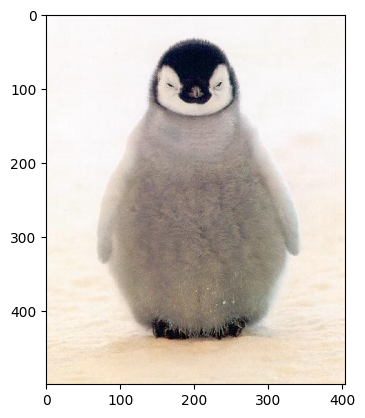

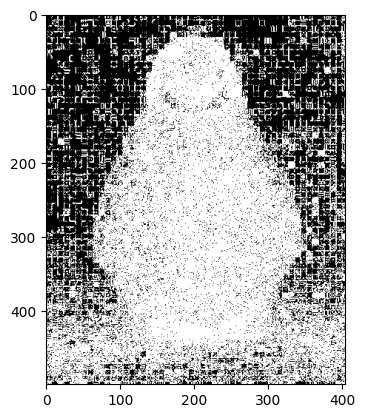

In [ ]:
# Load the image
img = cv2.imread('samples/penguin-chick.jpeg')

plt.imshow(img)
plt.show()


enhanced = gradient_domain_processing(img, 20, 0.6)

plt.imshow(enhanced, cmap='gray')
plt.show()
